In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import requests
from PIL import Image
from io import BytesIO


In [2]:
# Instantiate the connection from the website
url = 'https://www.pieces-euro.tv/'
r = rq.get(url)
print(r.status_code)

200


In [8]:
# Create the soup
soup = BeautifulSoup(r.text, 'html.parser')
# get specific 'id' from the soup
usermenu = soup.find(id='usermenu')

In [9]:
# get the href from the 'a' tag and ierate over the list

list = []
for a in usermenu.find_all('a', href=True):
    list.append(a['href'])
list[0] = list[0][:-1]

# click on the first link
click = rq.get(list[0])
print(r.status_code)


200


In [17]:
# inspect the soup of the new page
soup = BeautifulSoup(click.text, 'html.parser')

# get class cat_itembox from the soup
cat_itembox = soup.find_all(class_='cat_itembox')

In [18]:
for element in cat_itembox:
    # Extract the desired information from each element
    preis = element.find('p', class_='cat_preis').text.strip()
    titel = element.find('p', class_='cat_titel').text.strip()
    tirage = element.find('div', class_='cat_info').text.strip()
    picture_div = element.find('div', class_='cat_preuser')
    picture_url = picture_div.find('img')['data-original']
    base = 'https://www.pieces-euro.tv/'
    picture_url = base + picture_url
    
    # Print the extracted information
    print("Preis:", preis)
    print("Titel:", titel)
    print("Tirage:", tirage)
    print("Picture:", picture_url)

Preis: 2,25
Titel: Allemagne 1 Cent 2023 A
Tirage: Tirage: 28.800.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-1-Cent-2023-A-3390100-168265018226889.jpg
Preis: 2,00
Titel: Allemagne 2 Cent 2023 A
Tirage: Tirage: 18.000.000
Picture: https://www.pieces-euro.tv//img04/thumb/Allemagne-2-Cent-2023-A-3390150-168265018554688.jpg
Preis: 1,67
Titel: Allemagne 5 Cent 2023 A
Tirage: Tirage: 9.000.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-5-Cent-2023-A-3390200-168265019061568.jpg
Preis: 2,07
Titel: Allemagne 10 Cent 2023 A
Tirage: Tirage: 18.400.000
Picture: https://www.pieces-euro.tv//img01/thumb/Allemagne-10-Cent-2023-A-3390250-168265019589452.jpg
Preis: 2,25
Titel: Allemagne 20 Cent 2023 A
Tirage: Tirage: 11.000.000
Picture: https://www.pieces-euro.tv//img05/thumb/Allemagne-20-Cent-2023-A-3390300-168265020266188.jpg
Preis: 3,50
Titel: Allemagne 50 Cent 2023 A
Tirage: Tirage: 12.000.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-50-Cent-2023

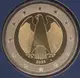

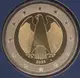

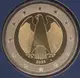

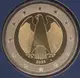

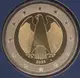

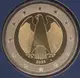

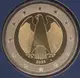

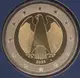

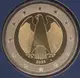

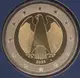

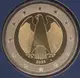

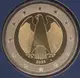

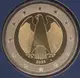

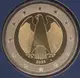

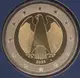

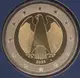

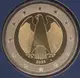

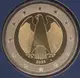

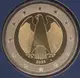

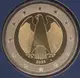

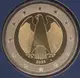

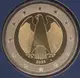

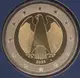

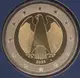

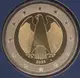

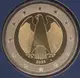

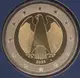

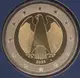

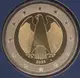

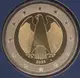

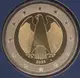

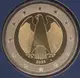

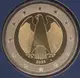

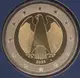

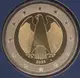

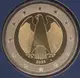

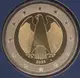

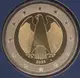

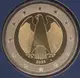

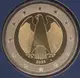

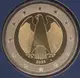

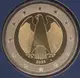

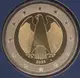

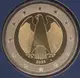

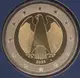

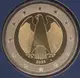

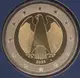

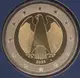

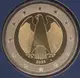

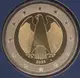

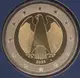

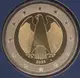

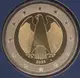

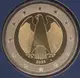

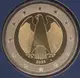

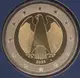

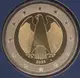

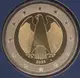

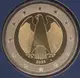

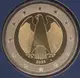

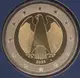

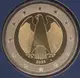

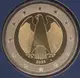

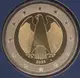

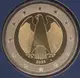

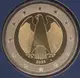

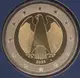

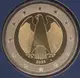

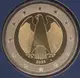

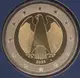

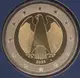

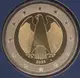

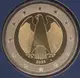

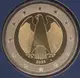

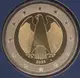

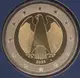

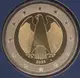

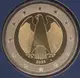

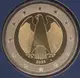

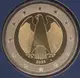

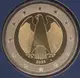

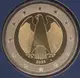

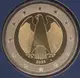

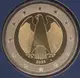

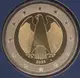

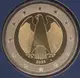

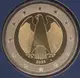

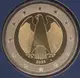

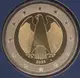

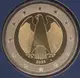

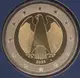

In [19]:
# Send a GET request to download the image
response = requests.get(picture_url)

for element in picture_url:
    # Check if the request was successful
    if response.status_code == 200:
        # Create an Image object from the downloaded image
        image = Image.open(BytesIO(response.content))
        # Display the images
        image.show()
        # Save the image to the local file system with a unique filename taking reference from the url 
    else:
        print("Failed to download the image.")
